## Libraries

In [ ]:
#!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast#master --upgrade
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/ximo/Documents/GitHub/skforecast')
%config Completer.use_jedi = False

In [1]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data

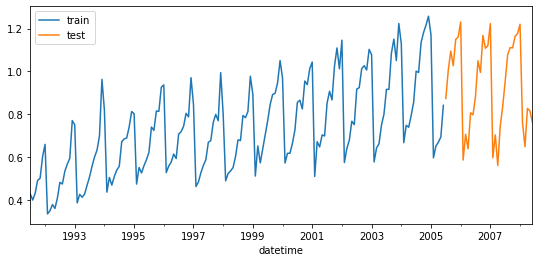

In [2]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

## Train forecaster

In [4]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(),
                    lags      = 15
                )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
Creation date: 2021-12-06 23:22:17 
Last fit date: 2021-12-06 23:22:17 
Skforecast version: 0.4.dev 

## Prediction

In [5]:
# Predict
# ==============================================================================
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(3)

2005-07-01    0.916878
2005-08-01    0.946228
2005-09-01    1.107921
Freq: MS, Name: pred, dtype: float64

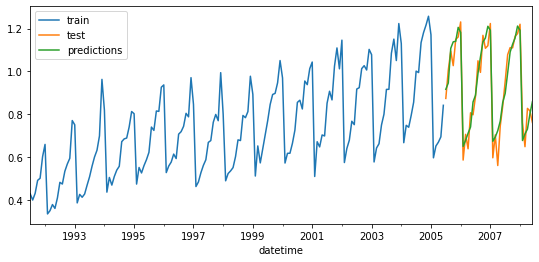

In [6]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [7]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 0.003811271443540486


## Feature importance

In [20]:
forecaster.get_feature_importance()

,feature,coef
0,lag_1,0.195142
1,lag_2,0.255029
2,lag_3,0.234592
3,lag_4,-0.030925
4,lag_5,-0.001666
5,lag_6,0.011375
6,lag_7,-0.039219
7,lag_8,0.019586
8,lag_9,-0.006604
9,lag_10,-0.002121


In [9]:
print(forecaster.get_feature_importance().to_markdown(index=False))

| feature   |   importance |
|:----------|-------------:|
| lag_1     |   0.0121745  |
| lag_2     |   0.0857522  |
| lag_3     |   0.0166948  |
| lag_4     |   0.00287025 |
| lag_5     |   0.00346738 |
| lag_6     |   0.00333398 |
| lag_7     |   0.00331932 |
| lag_8     |   0.00757049 |
| lag_9     |   0.00997129 |
| lag_10    |   0.01222    |
| lag_11    |   0.0120539  |
| lag_12    |   0.794896   |
| lag_13    |   0.00438497 |
| lag_14    |   0.0161486  |
| lag_15    |   0.0151425  |


## Extract training matrix

In [10]:
X, y = forecaster.create_train_X_y(data_train)
print(X.head().to_markdown())

| datetime            |    lag_1 |    lag_2 |    lag_3 |    lag_4 |    lag_5 |    lag_6 |    lag_7 |    lag_8 |    lag_9 |   lag_10 |   lag_11 |   lag_12 |   lag_13 |   lag_14 |   lag_15 |
|:--------------------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| 1992-10-01 00:00:00 | 0.534761 | 0.475463 | 0.483389 | 0.410534 | 0.361801 | 0.379808 | 0.351348 | 0.33622  | 0.660119 | 0.602652 | 0.502369 | 0.492543 | 0.432159 | 0.400906 | 0.429795 |
| 1992-11-01 00:00:00 | 0.568606 | 0.534761 | 0.475463 | 0.483389 | 0.410534 | 0.361801 | 0.379808 | 0.351348 | 0.33622  | 0.660119 | 0.602652 | 0.502369 | 0.492543 | 0.432159 | 0.400906 |
| 1992-12-01 00:00:00 | 0.595223 | 0.568606 | 0.534761 | 0.475463 | 0.483389 | 0.410534 | 0.361801 | 0.379808 | 0.351348 | 0.33622  | 0.660119 | 0.602652 | 0.502369 | 0.492543 | 0.432159 |
| 1993-01-01 00:00:00 | 0.771258 | 0.595223 | 0.568606 

In [11]:
print(y.head().to_markdown())

| datetime            |        y |
|:--------------------|---------:|
| 1992-10-01 00:00:00 | 0.568606 |
| 1992-11-01 00:00:00 | 0.595223 |
| 1992-12-01 00:00:00 | 0.771258 |
| 1993-01-01 00:00:00 | 0.751503 |
| 1993-02-01 00:00:00 | 0.387554 |
